# This section presents the implemention and the analysis of the logistic regression algorithm. 

## In the first part:
1. we import the necessary libraries and datasets, the california housing price.
2. we display the first few rows of the dataset and descriptive statistics to understand the basic structure of the dataset. 
3. we visualize the distribution of the target variable by plotting the distribution of the high value house

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HighValue  
0    -122.23          1  
1    -122.22          1  
2    -122.24          1  
3    -122.25          1  
4    -122.25          1  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.00

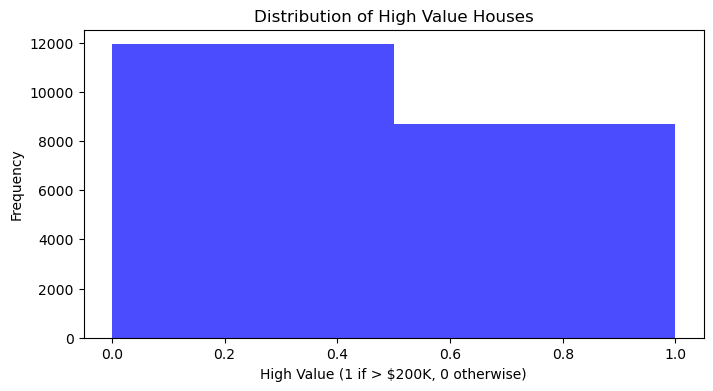

In [2]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# Convert the median house value to a binary category
data['HighValue'] = (data['MedHouseVal'] > 2).astype(int)  # 2 = $200,000
data.drop('MedHouseVal', axis=1, inplace=True)

# Show the first few rows of the dataset to understand its structure
print(data.head())

# Descriptive statistics for the dataset
print(data.describe())

# Plotting the distribution of the high value houses
plt.figure(figsize=(8, 4))
plt.hist(data['HighValue'], bins=2, color='blue', alpha=0.7)
plt.title('Distribution of High Value Houses')
plt.xlabel('High Value (1 if > $200K, 0 otherwise)')
plt.ylabel('Frequency')
plt.show()


## In the second part:

1. we partition the dataset into the features and the target data, the HighValue.
2. we split the dataset into the training set and the test set.
3. we train a logistic regression model on the training set when setting the epoch into 1000.
4. we show the coefficients and intercepts of the model to help understand the impact of each feature on the prediction target.


In [3]:
# Import libraries for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select features and target variable
X = data.drop('HighValue', axis=1)
y = data['HighValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 1.50917887e+00  4.27379715e-02 -6.30453938e-01  2.69263554e+00
   8.91882042e-05 -3.95281075e-01 -8.06451796e-02  2.18335213e-02]]
Intercept: [-0.37201011]


## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance by showing the hole classification report including accuracy, recall, precison, and F-1 score.
3. we use the confusion matrix to show how the model performs on different categories.

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2421
           1       0.80      0.74      0.77      1707

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128



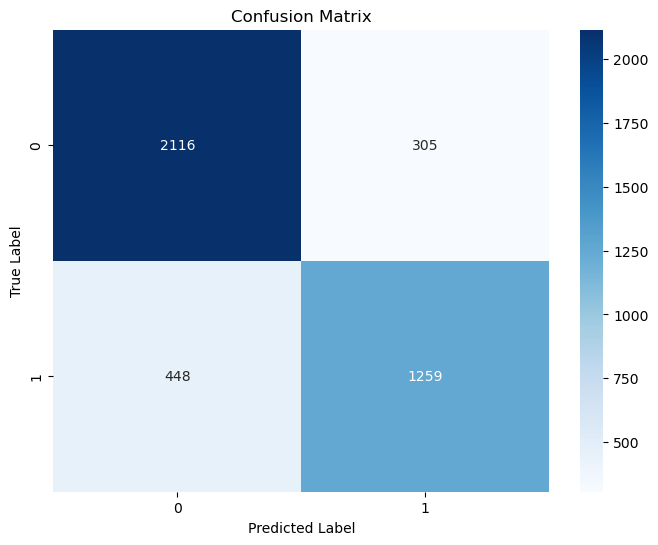

In [4]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Analysis part:
1. we further analyze the different regression implementation. For example, we control the parameter "penalty" to choose different regularization.
2. we train the model.
3. we use the confusion matrix and classification report to evaluate the model's performance. Here, we can observe that the accuracy is 84%, which is better than the default L-2 norm. 

Coefficients: [[ 1.31564241e+00  2.86047473e-02 -3.71152604e-01  2.14207171e+00
   7.71949540e-05 -2.96535745e-01 -1.33189386e+00 -1.33783270e+00]]
Intercept: [-118.46976569]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2421
           1       0.82      0.79      0.80      1707

    accuracy                           0.84      4128
   macro avg       0.84      0.83      0.83      4128
weighted avg       0.84      0.84      0.84      4128



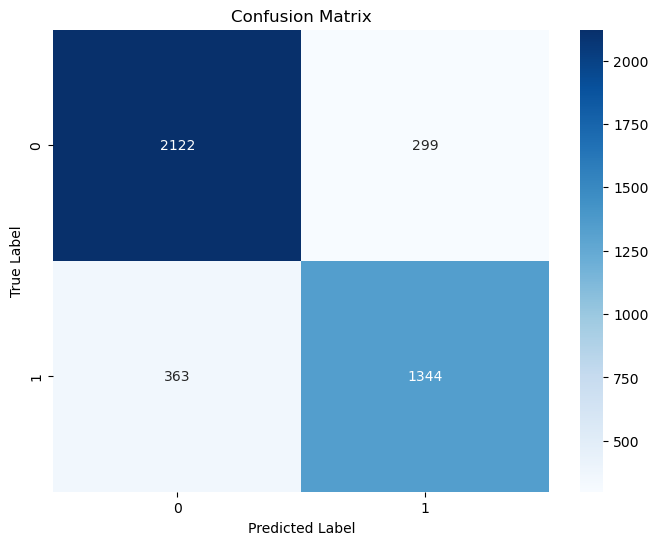

In [6]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = data.drop('HighValue', axis=1)
y = data['HighValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model, here the regularization is set to L-1 
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
